In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [42]:
train = pd.read_csv('train_cleaned.csv')

## Handling Outliers

In [43]:
outliers = ['AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE', 
'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
'HOUR_APPR_PROCESS_START', 'APARTMENTS_MODE', 
'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
'COMMONAREA_MODE', 'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_RECIVABLE']

for i in outliers: 
        total_negative_values = (train[i] < 0).sum()
        print(f"Total negative values in {i}: {total_negative_values}")

Total negative values in AMT_ANNUITY: 0
Total negative values in AMT_CREDIT: 0
Total negative values in AMT_GOODS_PRICE: 0
Total negative values in CNT_CHILDREN: 0
Total negative values in AMT_INCOME_TOTAL: 0
Total negative values in DAYS_EMPLOYED: 398053
Total negative values in REGION_POPULATION_RELATIVE: 0
Total negative values in CNT_FAM_MEMBERS: 0
Total negative values in HOUR_APPR_PROCESS_START: 0
Total negative values in APARTMENTS_MODE: 0
Total negative values in BASEMENTAREA_MODE: 0
Total negative values in YEARS_BEGINEXPLUATATION_MODE: 0
Total negative values in YEARS_BUILD_MODE: 0
Total negative values in COMMONAREA_MODE: 0
Total negative values in ELEVATORS_MODE: 0
Total negative values in ENTRANCES_MODE: 0
Total negative values in FLOORSMAX_MODE: 0
Total negative values in FLOORSMIN_MODE: 0
Total negative values in LANDAREA_MODE: 0
Total negative values in LIVINGAPARTMENTS_MODE: 0
Total negative values in LIVINGAREA_MODE: 0
Total negative values in NONLIVINGAPARTMENTS_MODE

In [44]:
train['DAYS_LAST_PHONE_CHANGE'] = train['DAYS_LAST_PHONE_CHANGE']  + 4173
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED']  + 17912
train['AMT_RECIVABLE'] = train['AMT_RECIVABLE'] + 223225

In [45]:
for i in outliers: 
        total_negative_values = (train[i] < 0).sum()
        print(f"Total negative values in {i}: {total_negative_values}")

Total negative values in AMT_ANNUITY: 0
Total negative values in AMT_CREDIT: 0
Total negative values in AMT_GOODS_PRICE: 0
Total negative values in CNT_CHILDREN: 0
Total negative values in AMT_INCOME_TOTAL: 0
Total negative values in DAYS_EMPLOYED: 0
Total negative values in REGION_POPULATION_RELATIVE: 0
Total negative values in CNT_FAM_MEMBERS: 0
Total negative values in HOUR_APPR_PROCESS_START: 0
Total negative values in APARTMENTS_MODE: 0
Total negative values in BASEMENTAREA_MODE: 0
Total negative values in YEARS_BEGINEXPLUATATION_MODE: 0
Total negative values in YEARS_BUILD_MODE: 0
Total negative values in COMMONAREA_MODE: 0
Total negative values in ELEVATORS_MODE: 0
Total negative values in ENTRANCES_MODE: 0
Total negative values in FLOORSMAX_MODE: 0
Total negative values in FLOORSMIN_MODE: 0
Total negative values in LANDAREA_MODE: 0
Total negative values in LIVINGAPARTMENTS_MODE: 0
Total negative values in LIVINGAREA_MODE: 0
Total negative values in NONLIVINGAPARTMENTS_MODE: 0
T

In [46]:
from scipy import stats

# Transformasi log untuk data yang positif
for i in outliers:
    train[i] = np.log(train[i] + 1)  # Tambahkan 1 untuk menghindari log(0)

print("Before removing outliers:", len(train))

# Hapus outlier menggunakan Z-score
for i in outliers:
    if train[i].dtype in ['int64', 'float64']:
        z_scores = np.abs(stats.zscore(train[i]))
        train = train[(z_scores <= 3) | (train[i].isna())]

print("After removing outliers:", len(train))


Before removing outliers: 398059
After removing outliers: 231814


## Normalization Transformation

In [47]:
X = train.drop(columns=['TARGET'])
y = train[['TARGET']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for i in list(X_train.select_dtypes(include = ['int64', 'float64']).columns):
    fitted = scaler.fit(X_train[[i]])
    X_train[i] = fitted.transform(X_train[[i]])
    X_test[i] = fitted.transform(X_test[[i]])

In [49]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

X_train = train.drop(columns=['TARGET'])
y_train = train[['TARGET']]

X_test = test.drop(columns=['TARGET'])
y_test = test[['TARGET']]

## Feature Encoding

In [50]:
X_train['is_currency_1'] = X_train['CREDIT_CURRENCY'].apply(lambda x : 1 if x == 'currency 1' else 0)
X_test['is_currency_1'] = X_test['CREDIT_CURRENCY'].apply(lambda x : 1 if x == 'currency 1' else 0)

X_train['FLAG_LAST_APPL_PER_CONTRACT'] = X_train['FLAG_LAST_APPL_PER_CONTRACT'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_LAST_APPL_PER_CONTRACT'] = X_test['FLAG_LAST_APPL_PER_CONTRACT'].map({'N' : 0,
                                                'Y' : 1})

X_train['EMERGENCYSTATE_MODE'] = X_train['EMERGENCYSTATE_MODE'].map({'No' : 0,
                                                'Yes' : 1})

X_test['EMERGENCYSTATE_MODE'] = X_test['EMERGENCYSTATE_MODE'].map({'No' : 0,
                                                'Yes' : 1})

X_train['is_stone'] = X_train['WALLSMATERIAL_MODE'].apply(lambda x : 1 if x == 'Stone, brick' else 0)
X_test['is_stone'] = X_test['WALLSMATERIAL_MODE'].apply(lambda x : 1 if x == 'Stone, brick' else 0)

X_train['is_block_of_flats'] = X_train['HOUSETYPE_MODE'].apply(lambda x : 1 if x == 'block of flats' else 0)
X_test['is_block_of_flats'] = X_test['HOUSETYPE_MODE'].apply(lambda x : 1 if x == 'block of flats' else 0)

X_train['is_reg_oper_account'] = X_train['FONDKAPREMONT_MODE'].apply(lambda x : 1 if x == 'reg oper account' else 0)
X_test['is_reg_oper_account'] = X_test['FONDKAPREMONT_MODE'].apply(lambda x : 1 if x == 'reg oper account' else 0)

X_train['is_business_entity_type_3'] = X_train['ORGANIZATION_TYPE'].apply(lambda x : 1 if x == 'Business Entity Type 3' else 0)
X_test['is_business_entity_type_3'] = X_test['ORGANIZATION_TYPE'].apply(lambda x : 1 if x == 'Business Entity Type 3' else 0)

X_train = pd.concat([X_train, pd.get_dummies(X_train['WEEKDAY_APPR_PROCESS_START'], prefix = 'WEEKDAY_APPR_PROCESS_START')], axis = 1)
X_test = pd.concat([X_test, pd.get_dummies(X_test['WEEKDAY_APPR_PROCESS_START'], prefix = 'WEEKDAY_APPR_PROCESS_START')], axis = 1)

X_train['is_laborers'] = X_train['OCCUPATION_TYPE'].apply(lambda x : 1 if x == 'Laborers' else 0)
X_test['is_laborers'] = X_test['OCCUPATION_TYPE'].apply(lambda x : 1 if x == 'Laborers' else 0)

X_train['is_house'] = X_train['NAME_HOUSING_TYPE'].apply(lambda x : 1 if x == 'House / apartment' else 0)
X_test['is_house'] = X_test['NAME_HOUSING_TYPE'].apply(lambda x : 1 if x == 'House / apartment' else 0)

X_train['is_married'] = X_train['NAME_FAMILY_STATUS'].apply(lambda x : 1 if x == 'Married' else 0)
X_test['is_married'] = X_test['NAME_FAMILY_STATUS'].apply(lambda x : 1 if x == 'Married' else 0)

X_train['is_secondary'] = X_train['NAME_EDUCATION_TYPE'].apply(lambda x : 1 if x == 'Secondary / secondary special' else 0)
X_test['is_secondary'] = X_test['NAME_EDUCATION_TYPE'].apply(lambda x : 1 if x == 'Secondary / secondary special' else 0)

X_train['is_cash_loans'] = X_train['NAME_CONTRACT_TYPE'].apply(lambda x : 1 if x == 'Cash loans' else 0)
X_test['is_cash_loans'] = X_test['NAME_CONTRACT_TYPE'].apply(lambda x : 1 if x == 'Cash loans' else 0)

X_train['is_female'] = X_train['CODE_GENDER'].apply(lambda x : 1 if x == 'F' else 0)
X_test['is_female'] = X_test['CODE_GENDER'].apply(lambda x : 1 if x == 'F' else 0)

X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].map({'N' : 0,
                                                'Y' : 1})


X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].map({'N' : 0,
                                                'Y' : 1})
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].map({'N' : 0,
                                                'Y' : 1})

X_train['is_unaccompanied'] = X_train['NAME_TYPE_SUITE'].apply(lambda x : 1 if x == 'Unaccompanied' else 0)
X_test['is_unaccompanied'] = X_test['NAME_TYPE_SUITE'].apply(lambda x : 1 if x == 'Unaccompanied' else 0)


X_train['is_working'] = X_train['NAME_INCOME_TYPE'].apply(lambda x : 1 if x == 'Working' else 0)
X_test['is_working'] = X_test['NAME_INCOME_TYPE'].apply(lambda x : 1 if x == 'Working' else 0)

In [51]:
col = ['SK_ID_CURR','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',  'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'CREDIT_CURRENCY']

X_train = X_train.drop(col, axis=1, errors='ignore')
X_test = X_test.drop(col, axis=1, errors='ignore')

## Feature Selection 

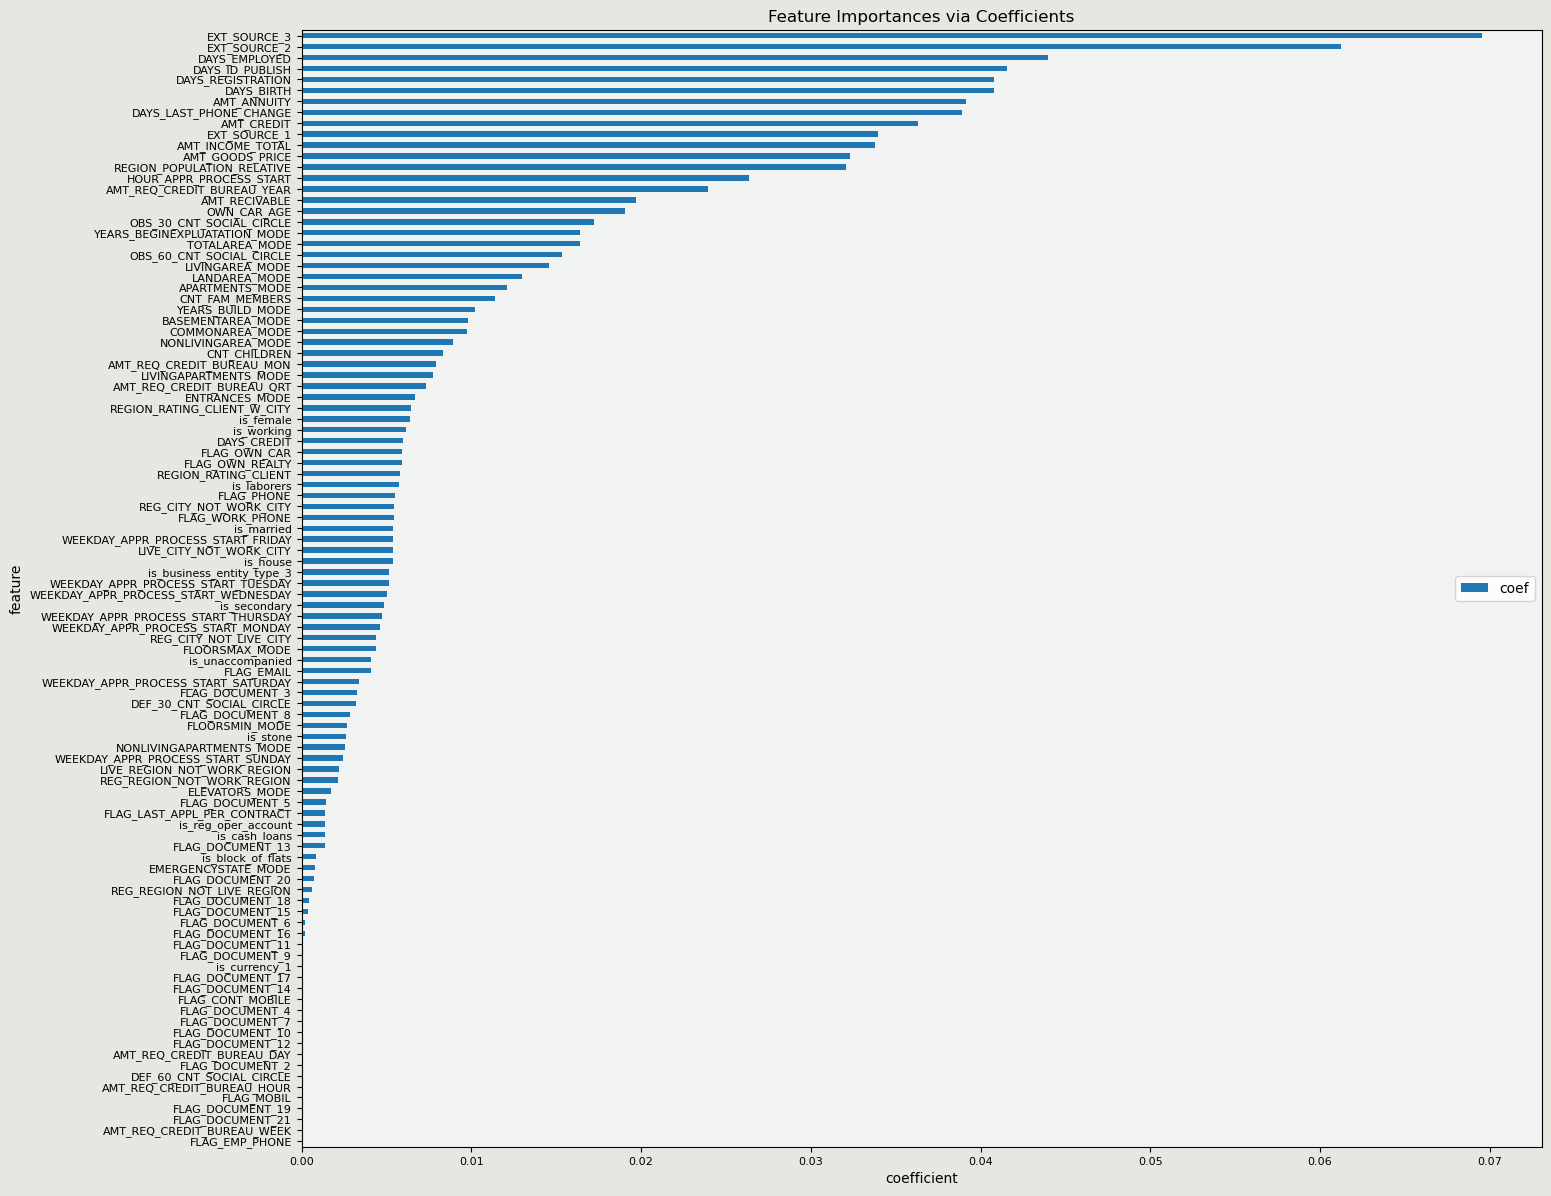

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))
importance = np.abs(clf.feature_importances_)
feature_names = np.array(X_train.columns)
plt.figure(figsize = (16, 14.5), facecolor='#e8e6e1')
ax = plt.axes()
ax.set_facecolor('#f1f2f2')
pd.DataFrame(list(zip(list(X_train.columns), clf.feature_importances_)), columns = ['feature', 'coef'])\
            .sort_values(by = ['coef'], ascending = True).reset_index(drop = True)\
            .plot(x = 'feature', kind = 'barh', fontsize = 8, ax = ax)
plt.title("Feature Importances via Coefficients")
plt.xlabel('coefficient')
plt.legend(loc = 'center right')

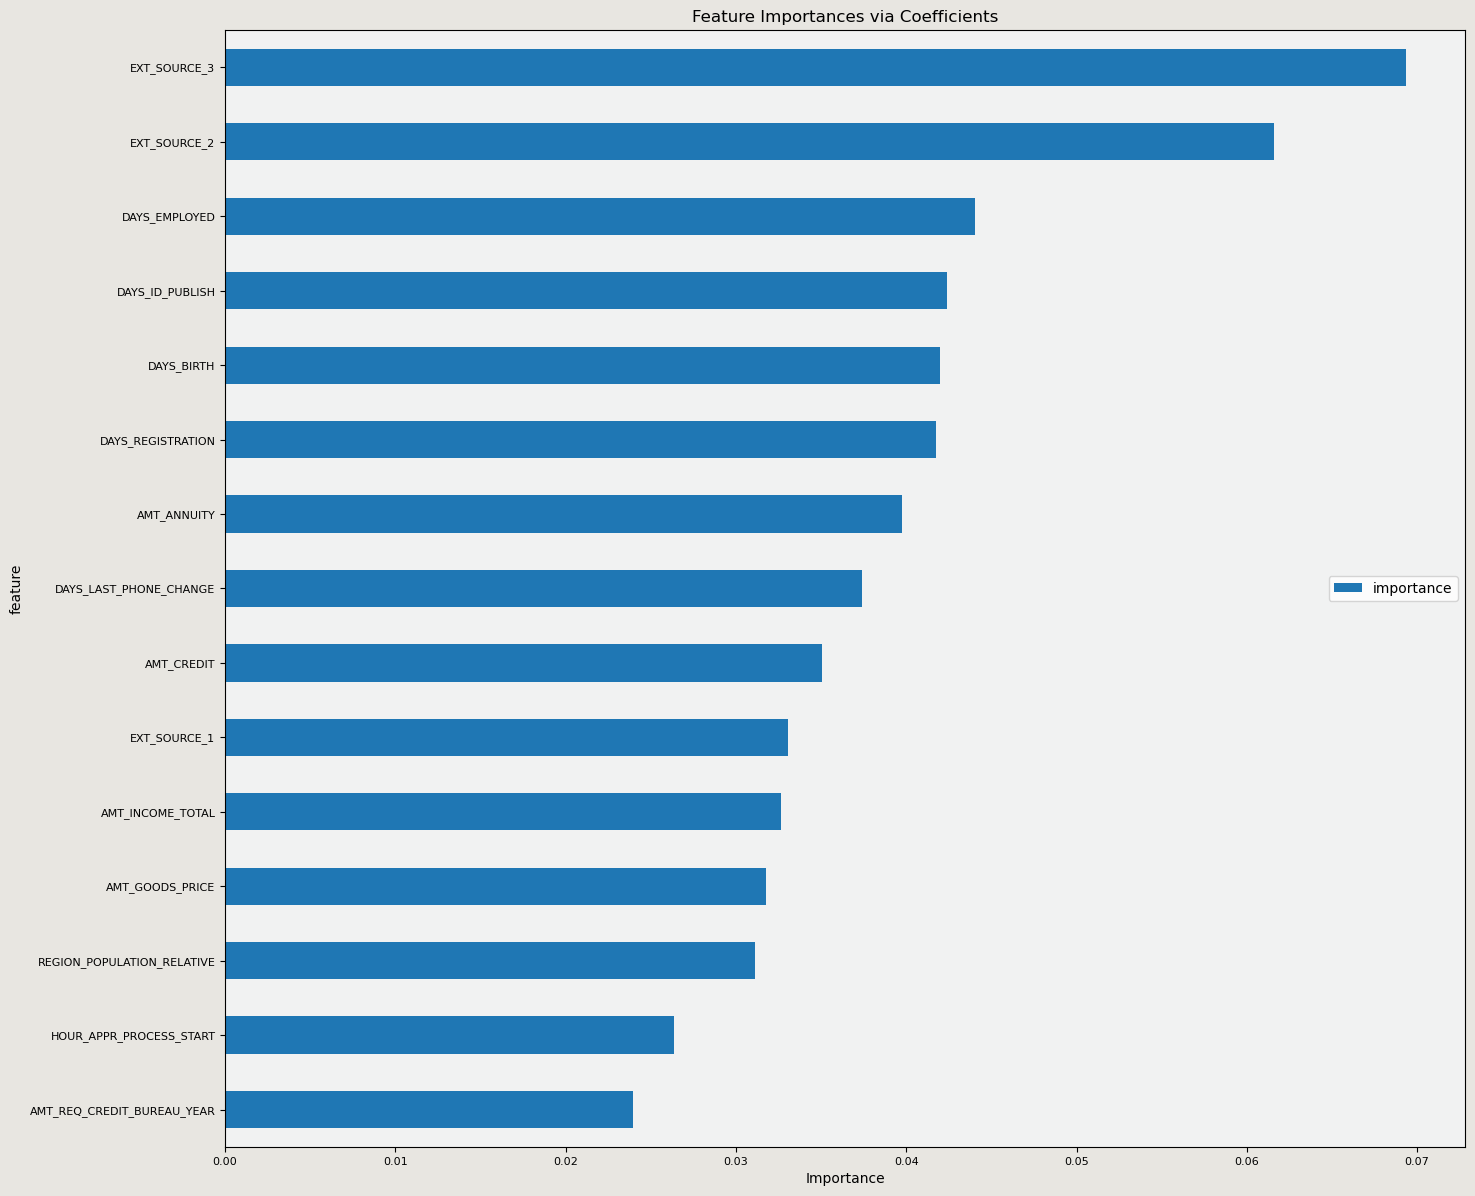

Selected Features:
3               AMT_INCOME_TOTAL
4                     AMT_CREDIT
5                    AMT_ANNUITY
6                AMT_GOODS_PRICE
7     REGION_POPULATION_RELATIVE
8                     DAYS_BIRTH
9                  DAYS_EMPLOYED
10             DAYS_REGISTRATION
11               DAYS_ID_PUBLISH
22       HOUR_APPR_PROCESS_START
29                  EXT_SOURCE_1
30                  EXT_SOURCE_2
31                  EXT_SOURCE_3
52        DAYS_LAST_PHONE_CHANGE
78    AMT_REQ_CREDIT_BUREAU_YEAR
Name: feature, dtype: object


In [33]:
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': clf.feature_importances_})

selected_features = feature_importance_df[feature_importance_df['importance'] >= 0.02]['feature']


plt.figure(figsize=(16, 14.5), facecolor='#e8e6e1')
ax = plt.axes()
ax.set_facecolor('#f1f2f2')
feature_importance_df.loc[feature_importance_df['feature'].isin(selected_features)]\
    .sort_values(by='importance', ascending=True)\
    .reset_index(drop=True)\
    .plot(x='feature', kind='barh', fontsize=8, ax=ax)
plt.title("Feature Importances via Coefficients")
plt.xlabel('Importance')
plt.legend(loc='center right')
plt.show()


print("Selected Features:")
print(selected_features)

In [53]:
col = ['AMT_INCOME_TOTAL',' AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE',
          'REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED', ' DAYS_REGISTRATION',
          'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 
          'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', ' AMT_REQ_CREDIT_BUREAU_YEAR']

X_train = X_train.drop(columns = [i for i in X_train.columns if i not in col])
X_test = X_test.drop(columns = [i for i in X_test.columns if i not in col])

## Class Imbalance

In [54]:
from imblearn import over_sampling

X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)

In [55]:
pd.concat([X_train, y_train], axis = 1).duplicated().sum()

147084

In [56]:
pd.concat([X_test, y_test], axis = 1).duplicated().sum()

56318

In [57]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

train = train.drop_duplicates()
test = test.drop_duplicates()

X_train = train.drop(columns=['TARGET'])
y_train = train[['TARGET']]

X_test = test.drop(columns=['TARGET'])
y_test = test[['TARGET']]

## Modelling

Setelah dataset dipreprocessing maka kami akan melatih dataset train terlebih dahulu dan kemudian setelah itu kami menguji pada dataset test, serta melihat evaluasi model tersebut. Disini kami menggunakan 6 model dan memilih model skor evaluasi akurasi tertinggi.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def eval_classification():
    n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
    criterion = ['gini', 'entropy']
    max_depth = [int(x) for x in np.linspace(2, 100, 50)]
    min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
    min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
    
    hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                           min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    list_model = {'Logistic Regression' : LogisticRegression(),
                  'XGBoost Classifier' : XGBClassifier(),
                  'LGBM Classifier' : LGBMClassifier()}
    
    for key, val in list_model.items():
        model = val
        model.fit(X_train_over, y_train_over)
    
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        print(key, "Evaluation Result")
        print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
        print("")

In [59]:
eval_classification()

Logistic Regression Evaluation Result
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.71

XGBoost Classifier Evaluation Result
roc_auc (train-proba): 0.97
roc_auc (test-proba): 0.97

[LightGBM] [Info] Number of positive: 73390, number of negative: 146781
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2872
[LightGBM] [Info] Number of data points in the train set: 220171, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333332 -> initscore=-0.693154
[LightGBM] [Info] Start training from score -0.693154
LGBM Classifier Evaluation Result
roc_auc (train-proba): 0.90
roc_auc (test-proba): 0.91



### Confusion Matrix

Setelah menemukan model dengan skor akurasi terbaik, kami menampilkan confusion matrix untuk menyediakan gambaran rinci tentang kinerja model dengan membandingkan hasil prediksi model dengan kenyataan yang sebenarnya.

Confusion matrix:
 [[145781   1000]
 [  3059  70331]]


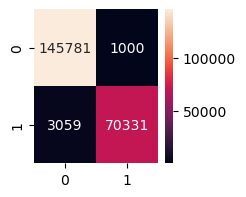

In [60]:
from sklearn.metrics import confusion_matrix

XGBoost = XGBClassifier()
XGBoost.fit(X_train_over, y_train_over)

y_predicted_train = XGBoost.predict(X_train_over)
cma = confusion_matrix(y_train_over, y_predicted_train)
print('Confusion matrix:\n', cma)

df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize=(2, 2))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='g')
plt.show()

- True Positive (TP): Model memprediksi data ada di kelas positif dan yang sebenarnya data memang ada di kelas positif. Dalam kasus ini, terdapat 70.331 data yang diprediksi positif dan ternyata benar-benar positif.
- False Positive (FP): Model memprediksi data ada di kelas positif dan yang sebenarnya data ada di kelas negatif. Dalam kasus ini, terdapat 1.000 data yang diprediksi positif dan ternyata benar-benar negatif.
- True Negative (TN): Model memprediksi data ada di kelas negatif dan yang sebenarnya data memang ada di kelas negatif. Dalam kasus ini, terdapat 145.781 data yang diprediksi negatif dan ternyata benar-benar negatif.
- False Negative (FN): Model memprediksi data ada di kelas negatif dan yang sebenarnya data ada di kelas positif. Dalam kasus ini, terdapat 3.059 data yang diprediksi negatif dan ternyata benar-benar positif.


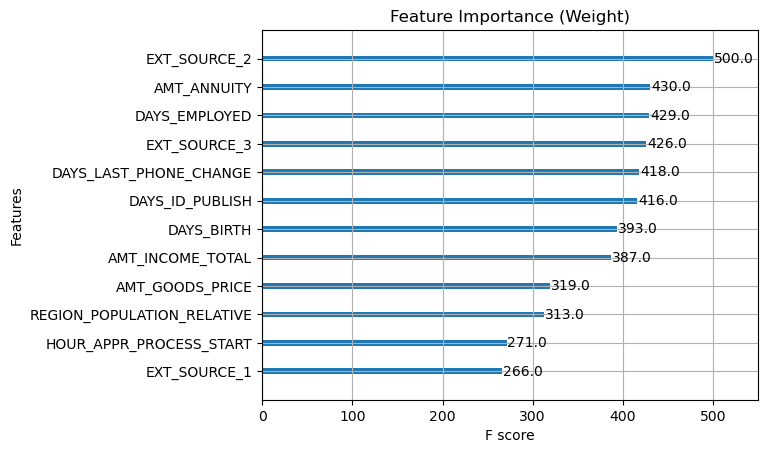

In [61]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_over, y_train_over) 

plot_importance(xgb_model,  title='Feature Importance (Weight)')
plt.show()



Dari grafik plot imoirtance diatas,terlihat bahwa feature importance untuk target 0 = tidak memiliki kesulitan pembayaran dan 1 = memiliki kesulitan pembayaran adalah sebagai berikut:
-  EXT_SOURCE_3 dan EXT_SOURCE_2 adalah skor yang diberikan oleh lembaga pemeringkat kredit. Skor yang tinggi menunjukkan bahwa lembaga pemeringkat kredit memiliki penilaian positif terhadap kemampuan seseorang untuk membayar utang. Oleh karena itu, semakin tinggi nilai EXT_SOURCE_3, maka semakin kecil kemungkinannya seseorang akan mengalami kesulitan pembayaran.
- AMT_ANNUITY adalah besarnya angsuran bulanan yang harus dibayarkan. Besarnya angsuran bulanan menunjukkan beban finansial seseorang. Oleh karena itu, semakin tinggi nilai AMT_ANNUITY, maka semakin besar kemungkinannya seseorang akan mengalami kesulitan pembayaran.
- DAYS_EMPLOYED adalah jumlah hari seseorang bekerja secara terus-menerus. Lamanya bekerja menunjukkan stabilitas finansial seseorang. Oleh karena itu, semakin lama seseorang bekerja, maka semakin kecil kemungkinannya akan mengalami kesulitan pembayaran.
- DAYS_LAST_PHONE_CHANGE menunjukkan jumlah hari seseorang tidak mengganti nomor teleponnya. Lamanya seseorang tidak mengganti nomor teleponnya menunjukkan stabilitas kehidupan seseorang. Oleh karena itu, semakin lama seseorang tidak mengganti nomor teleponnya, maka semakin kecil kemungkinannya akan mengalami kesulitan pembayaran
- DAYS_ID_PUBLISH adalah jumlah hari seseorang memiliki kartu identitas. Lamanya memiliki kartu identitas menunjukkan stabilitas identitas seseorang. Oleh karena itu, semakin lama seseorang memiliki kartu identitas, maka semakin kecil kemungkinannya akan mengalami kesulitan pembayaran.
- DAYS_BIRTH adalah jumlah hari seseorang lahir. Usia menunjukkan pengalaman hidup seseorang. Oleh karena itu, semakin tua seseorang, maka semakin besar kemungkinannya seseorang akan memiliki pengalaman hidup yang lebih baik dalam mengelola keuangan.
- AMT_INCOME_TOTAL memiliki feature importance kelima tertinggi, hal ini mungkin dikarenakan AMT_INCOME_TOTAL adalah total pendapatan seseorang. Total pendapatan menunjukkan kemampuan finansial seseorang. Oleh karena itu, semakin tinggi nilai AMT_INCOME_TOTAL, maka semakin kecil kemungkinannya seseorang akan mengalami kesulitan pembayaran.
- REGION_POPULATION_RELATIVE adalah populasi relatif wilayah tempat tinggal seseorang. Populasi relatif menunjukkan kondisi ekonomi wilayah tempat tinggal seseorang. Oleh karena itu, semakin tinggi populasi relatif wilayah tempat tinggal seseorang, maka semakin besar kemungkinannya seseorang akan memiliki kondisi ekonomi yang lebih baik.

Secara umum, dapat disimpulkan bahwa faktor-faktor yang paling berpengaruh terhadap kemungkinan seseorang mengalami kesulitan pembayaran adalah:

    - Sumber informasi kredit
    - Besarnya angsuran bulanan
    - Perubahan nomor telepon
    - Lamanya bekerja
    - Pendapatan total
    - Lamanya memiliki kartu identitas
    - Usia
    - Populasi relatif wilayah tempat tinggal
    
